<a href="https://colab.research.google.com/github/snowman74/Neural-Networks/blob/main/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Автокодировщики**

In [ ]:
import tensorflow.keras

In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.3.0          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.2.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.2.1          
blis                          0.4.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, Reshape, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist, fashion_mnist

from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from PIL import Image
import time
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def my_autoencoder(shape=(112, 80, 1)):
  img_input = Input((shape))

  branch = Conv2D(32, (3,3), padding='same', activation='relu')(img_input)
  branch = BatchNormalization()(branch)
  branch = Conv2D(32, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)
  branch = MaxPooling2D()(branch)

  branch = Conv2D(64, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)
  branch = Conv2D(64, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)

  z = MaxPooling2D()(branch)
  branch = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same', activation='relu')(z)
  branch = BatchNormalization()(branch)
  
  branch = Conv2D(64, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)
  branch = Conv2D(64, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)

  branch = Conv2DTranspose(32, (2,2), strides=(2,2), activation='relu', padding='same')(branch)
  branch = BatchNormalization()(branch)
  
  branch = Conv2D(32, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)
  branch = Conv2D(32, (3,3), padding='same', activation='relu')(branch)
  branch = BatchNormalization()(branch)

  output = Conv2D(1, (3,3), activation='sigmoid', padding='same')(branch)
  model = Model(img_input, output)
  model.compile(optimizer=Adam(lr=1e-4),
                loss='mean_squared_error')
  
  return model

In [ ]:
# функция отрисовки картинок
def plotting(xTrain, pred, shape=(112, 80)):
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    index = np.random.randint(0, pred.shape[0])
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xTrain[index].reshape(shape))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[index].reshape(shape))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

# Функция среднеквадратичной ошибки
def getMSE(x1, x2):
  x1 = x1.flatten()
  x2 = x2.flatten()
  delta = x1 - x2
  return sum(delta ** 2) / len(delta)

 

In [ ]:
# Загружаем данные
(xTrainMN, yTrainMN), (xTestMN, yTestMN) = mnist.load_data()
# для увеличения точности попробуем объединить эти массивы в один
xTrainMN = np.concatenate((xTrainMN, xTestMN), axis=0)
yTrainMN = np.concatenate((yTrainMN, yTestMN), axis=0)
# нормируем данные (от 0 до 1)
xTrainMN = xTrainMN.astype('float32') / 255
# решейпим до нужных размеров
xTrainMN = xTrainMN.reshape(xTrainMN.shape[0], 28, 28, 1)

In [ ]:
modelMN = my_autoencoder(shape=(28,28,1))

In [ ]:
modelMN.fit(xTrainMN[:50000], xTrainMN[:50000], batch_size=512, epochs=50, validation_data=(xTrainMN[50000:], xTrainMN[50000:]))

Epoch 1/50
98/98 [==============================] - 9s 91ms/step - loss: 0.1233 - val_loss: 0.1070
Epoch 2/50
98/98 [==============================] - 8s 85ms/step - loss: 0.0384 - val_loss: 0.0998
Epoch 3/50
98/98 [==============================] - 8s 85ms/step - loss: 0.0220 - val_loss: 0.0719
Epoch 4/50
98/98 [==============================] - 8s 85ms/step - loss: 0.0153 - val_loss: 0.0198
Epoch 5/50
98/98 [==============================] - 8s 85ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 6/50
98/98 [==============================] - 8s 86ms/step - loss: 0.0097 - val_loss: 0.0082
Epoch 7/50
98/98 [==============================] - 8s 86ms/step - loss: 0.0083 - val_loss: 0.0071
Epoch 8/50
98/98 [==============================] - 8s 86ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 9/50
98/98 [==============================] - 8s 86ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 10/50
98/98 [==============================] - 8s 86ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 11/

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modelMN.save('/content/drive/My Drive/модели/modelMN_hw22.h5')
# modelMN = load_model('/content/drive/My Drive/модели/modelMN_hw22.h5')

In [ ]:
# смотрим на результат работы автокодировщика
predMN = modelMN.predict(xTrainMN)
predMN = predMN * 255 # делаем обратную перенормировку
predMN = predMN.astype('uint8')

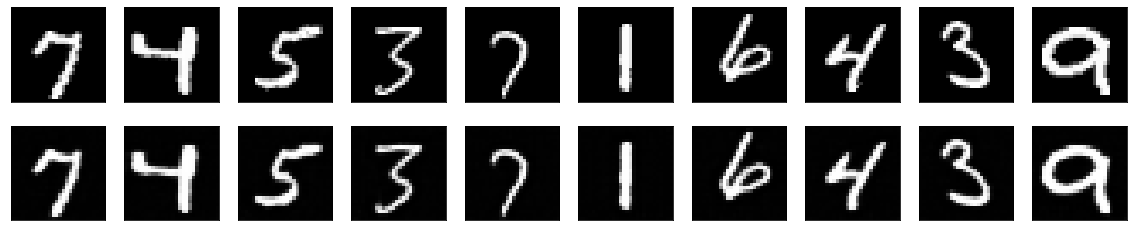

In [ ]:
plotting(xTrainMN, predMN, shape=(28,28))

In [ ]:
# теперь посчитаем ошибку
err = [getMSE(xTrainMN[i], predMN[i]/255) for i in range(len(xTrainMN))]
n = 70000
print("Средняя ошибка на MNIST:", sum(err[0:n]) / n) # взглянем на среднюю ошибку на обучающей выборке
print("Средняя шибка на  тестовом наборе MNIST:", sum(err[10000:10000+n]) / n) # и на проверочной выборке

Средняя ошибка на MNIST: 0.001117677917973292
Средняя шибка на  тестовом наборе MNIST: 0.000958888191539493


In [ ]:
# а теперь подготовим данные из набора FashionMnist и прогоним их через наш автокодировщик, чтобы проверить его работу
(xTrainFMN, yTrainFMN), (xTestFMN, yTestFMN) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
xTrainFMN = xTrainFMN.astype('float32') / 255
xTrainFMN = xTrainFMN.reshape(xTrainFMN.shape[0], 28, 28, 1)

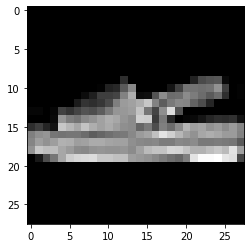

In [ ]:
# Взглянем на пример изображения из базы fashion_mnist
n = 760 # выбираем картинку
xxT = xTrainFMN[n].reshape((28,28)) # указываем размеры этой картинки как 28*28
xxT = xxT * 255 # представляем в виде значений от 0 до 255

img = Image.fromarray(xxT) # из указанного массива значений будем строить рисунок
plt.imshow(img.convert('RGBA')) # переводим в 4х-канальное цветовое пространство RGBA
plt.show() # покажем картинку

In [ ]:
predFMN = modelMN.predict(xTrainFMN[:100])
predFMN = predFMN * 255
predFMN = predFMN.astype('uint8')

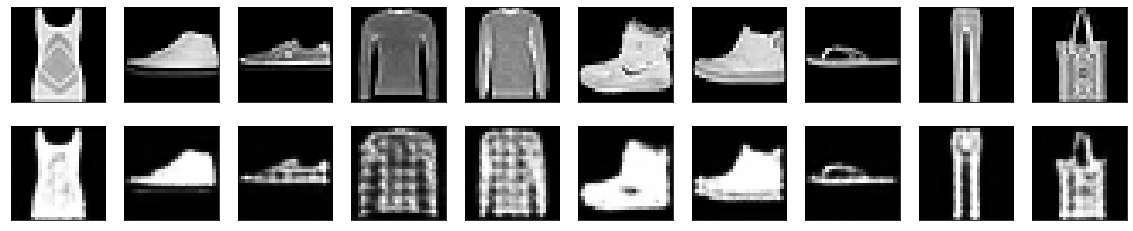

In [ ]:
plotting(xTrainFMN, predFMN, shape=(28,28))

In [ ]:
# посчитаем среднеквадратичные ошибки и выведем их для Mnist и для FashionMnist 
errFMN = [getMSE(xTrainFMN[i], predFMN[i] / 255) for i in range(len(predFMN))]
print("Ошибка на Mnist:", err[10000:10020])
print("Ошибка на одежде:", errFMN[:20])
print("Средняя ошибка на Mnist:", round(sum(err[10000:]) / len(err[10000:]), 4))
print("Средняя ошибка на одежде:", round(sum(errFMN) / len(errFMN), 4))
print("Максимальная ошибка на Mnist:", round(max(err[10000:]),4))
print("Минимальная ошибка на одежде:", round(min(errFMN),4))

Ошибка на Mnist: [0.0007407864268298762, 0.0014535813836156794, 0.0008537924550854486, 0.0011287455608632454, 0.000968485390668838, 0.002295231666074516, 0.00041498949468696115, 0.00034554995247787853, 0.0030439430339581812, 0.0011566391113959525, 0.0016311033936501614, 0.0011521470927618495, 0.0017455805997956552, 0.0008224269658340704, 0.00177692638640446, 0.0013361226396364286, 0.0010404946002741556, 0.0007237011816289908, 0.0010216635622204617, 0.00048788136848648667]
Ошибка на одежде: [0.017494683041752345, 0.02069602235943722, 0.008745145470391293, 0.01809929830539165, 0.009904883158037923, 0.03786812632925768, 0.008863525546855698, 0.00862611656811, 0.0067495823751302355, 0.006150264058446656, 0.028941024335749792, 0.008782865589053685, 0.011452404683232713, 0.008653147576403578, 0.008842497768532446, 0.015589685825281658, 0.019420453646764063, 0.02424157653180998, 0.03499587701327522, 0.010801791713332967]
Средняя ошибка на Mnist: 0.0011
Средняя ошибка на одежде: 0.0159
Максима

In [ ]:
bias = 0.0027 # установим какое-то пороговое значение

isMN = [e < bias for e in err[10000:]] # запишем каждую ошибку больше порогового значения, Mnist
isFMN = [e < bias for e in errFMN] # запишем каждую ошибку больше порогового значения, fashion_mnist

print("Mnist распознано, как Mnist: ", round(100*sum(isMN) / len(isMN)),"%", sep="")
print("Одежды распознано, как Mnist: ", round(100*sum(isFMN) / len(isFMN)),"%", sep="")
print("Суммарная ошибка: ", round(100*(1-(sum(isMN) / len(isMN)) + sum(isFMN) / len(isFMN))),"%", sep="")

Mnist распознано, как Mnist: 99.0%
Одежды распознано, как Mnist: 1.0%
Суммарная ошибка: 2.0%


In [ ]:
# Теперь перепишем автокодировщик для базы ЛИЦ

In [ ]:
!unzip -q '/content/drive/My Drive/Базы/Лица.zip'

In [ ]:
img_dir = 'Лица'
img_height = 112
img_width = 80

In [ ]:
# функция для загрузки и преобразования изображений к нужным размерам
def load_images(img_dir, img_height, img_width):
  img_list = []
  for img in os.listdir(img_dir):
    img_list.append(image.img_to_array(image.load_img(os.path.join(img_dir, img), 
                                                      target_size=(img_height, img_width), 
                                                      color_mode='grayscale')))
  return np.array(img_list)

In [ ]:
curr_time = time.time()
xTrain_img = load_images(img_dir, img_height, img_width)
print('Время загрузки -> ', round(time.time() - curr_time, 2), ' секунд', sep='')

Время загрузки -> 35.25 секунд


In [ ]:
# сделаем нормировку
xTrain_img = xTrain_img / 255

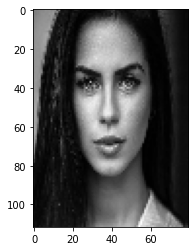

In [ ]:
plt.imshow(xTrain_img[np.random.randint(0, xTrain_img.shape[0])].reshape(112,80), cmap='gray')

In [ ]:
# создаем автокодировщик
modelIMG = my_autoencoder()
modelIMG.fit(xTrain_img[:4700], xTrain_img[:4700], 
             epochs=150, batch_size=128, 
             validation_data=(xTrain_img[4700:], xTrain_img[4700:]))

Epoch 1/150
37/37 [==============================] - 8s 230ms/step - loss: 0.0478 - val_loss: 0.0696
Epoch 2/150
37/37 [==============================] - 8s 208ms/step - loss: 0.0139 - val_loss: 0.0691
Epoch 3/150
37/37 [==============================] - 8s 209ms/step - loss: 0.0084 - val_loss: 0.0687
Epoch 4/150
37/37 [==============================] - 8s 210ms/step - loss: 0.0064 - val_loss: 0.0656
Epoch 5/150
37/37 [==============================] - 8s 211ms/step - loss: 0.0056 - val_loss: 0.0614
Epoch 6/150
37/37 [==============================] - 8s 212ms/step - loss: 0.0050 - val_loss: 0.0566
Epoch 7/150
37/37 [==============================] - 8s 212ms/step - loss: 0.0045 - val_loss: 0.0508
Epoch 8/150
37/37 [==============================] - 8s 213ms/step - loss: 0.0042 - val_loss: 0.0438
Epoch 9/150
37/37 [==============================] - 8s 214ms/step - loss: 0.0040 - val_loss: 0.0348
Epoch 10/150
37/37 [==============================] - 8s 215ms/step - loss: 0.0038 - val_lo

In [ ]:
modelIMG.save('/content/drive/My Drive/модели/modelImageFaces_hw22.h5')
# modelIMG = load_model('/content/drive/My Drive/модели/modelImageFaces_hw22.h5')

In [ ]:
predIMG = modelIMG.predict(xTrain_img[:100])
predIMG = predIMG * 255
predIMG = predIMG.astype('uint8')

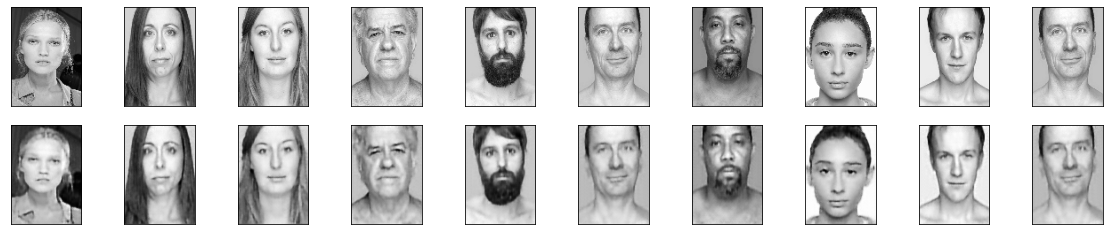

In [ ]:
plotting(xTrain_img, predIMG)

In [ ]:
# посчитаем среднеквадратичные ошибки и выведем их для лиц 
errIMG = [getMSE(xTrain_img[i], predIMG[i] / 255) for i in range(len(predIMG))] # посчитаем ошибку для всех изображений
print("Ошибка на Лицах:", errIMG[80:]) #посмотрим последнии 20
print("Средняя ошибка на Лицах:", round(sum(errIMG[80:]) / len(errIMG[80:]), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на Лицах:", round(min(errIMG),4)) #найдем минимальную ошибку

Ошибка на Лицах: [0.0010447734507226135, 0.0026412902605173374, 0.001270745976067277, 0.0014749874549000595, 0.004686741643335169, 0.0013945118955159886, 0.002783814432677273, 0.0008680762791003835, 0.0022166733415104646, 0.0013089764394268947, 0.0010361881511366142, 0.0009736589752437919, 0.0019046333429058651, 0.0010828391715029758, 0.0027979796606789203, 0.0007044682247291669, 0.0015279254900361946, 0.0009410513466166764, 0.010521673063456834, 0.0006603127822237865]
Средняя ошибка на Лицах: 0.0021
Минимальная ошибка на Лицах: 0.0005


In [ ]:
bias = 0.02 # установим какое-то пороговое значение

isFase = [e < bias for e in errIMG[80:]] # запишем каждую ошибку больше порогового значения

print("Лица распознаны, как Лица: ", round(100*sum(isFase) / len(isFase)),"%", sep="")

Лица распознаны, как Лица: 100.0%


Напишем “автокодировщик”, который будет из рукописных цифр MNIST генерировать из соответствующего изображения на CIFAR, т.е. генерировать из цифры MNIST - картинки CIFAR соответствующего класса


In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
(xTrainFashion, yTrainFashion), (xTestFashion, yTestFashion) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
xTrainMnist.shape

(60000, 28, 28)

In [ ]:
# для того, чтобы отсортировать мнист по классам - объединим все в один датафрейм, 
# где последней колонкой будут метки классов, для этого преобразуем форму
dfMnist = pd.DataFrame(xTrainMnist.reshape(60000, 28*28))
x = dfMnist.values
xTrainMnist[0] == x.reshape(60000, 28, 28)[0] # проверим, совпадают ли итоговые массивы

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True

In [ ]:
dfMnist['classes'] = yTrainMnist
dfMnist.sort_values(by='classes', inplace=True) # теперь отсортируем получившийся датафрэйм по меткам классов

In [ ]:
dfMnist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,classes
30207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
52034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
23285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
15728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
# в датасетах Mnist и FashionMnist разное число экземпляров каждого класса, возьмем по 5400 от каждого - запишем в итоговые датафрэймы
# dfMnist[dfMnist['classes' == 1]].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
yTrainMnist[(yTrainMnist == 0) | (yTrainMnist == 1)| (yTrainMnist == 2)| (yTrainMnist == 3)| (yTrainMnist == 4)| (yTrainMnist == 5)| (yTrainMnist == 6)| (yTrainMnist == 7)| (yTrainMnist == 8)| (yTrainMnist == 9)].size

60000

In [ ]:
# так как с помощью масок не удается сформировать новый датафрейм (кончается ОЗУ)
# с уравновешенными классами, пройдемся вручную, благо классов всего 10
df0 = dfMnist.iloc[:5400]
df1 = dfMnist.iloc[5924:5924 + 5400]
df2 = dfMnist.iloc[12666:12666 + 5400]
df3 = dfMnist.iloc[18624:18624 + 5400]
df4 = dfMnist.iloc[24755:24755 + 5400]
df5 = dfMnist.iloc[30597:30597 + 5400]
df6 = dfMnist.iloc[36018:36018 + 5400]
df7 = dfMnist.iloc[41936:41936 + 5400]
df8 = dfMnist.iloc[48201:48201 + 5400]
df9 = dfMnist.iloc[54052:54052 + 5400]

In [ ]:
df_final_mnist = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]) # в итоговом датафрейме экземпляров каждого класса по ровну
df_final_mnist.reset_index(inplace=True)
df_final_mnist.drop('index', inplace=True, axis=1)

In [ ]:
yTrain_mnist_5400 = df_final_mnist['classes'].values
df_final_mnist.drop('classes', inplace=True, axis=1)

In [ ]:
yTrain_mnist_5400

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [ ]:
xTrain_mnist_5400 = df_final_mnist.values
xTrain_mnist_5400 = xTrain_mnist_5400.reshape((54000, 28, 28, 1))
xTrain_mnist_5400.shape

(54000, 28, 28, 1)

**Проделаем тоже самое с FASHION MNIST**

In [ ]:
xTrainFashion.shape

(60000, 28, 28)

In [ ]:
# для того, чтобы отсортировать Fasion мнист по классам - объединим все в один датафрейм, 
# где последней колонкой будут метки классов, для этого преобразуем форму
dfFashMnist = pd.DataFrame(xTrainFashion.reshape(60000, 28*28))
x = dfFashMnist.values
xTrainFashion[0] == x.reshape(60000, 28, 28)[0] # проверим, совпадают ли итоговые массивы

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True

In [ ]:
dfFashMnist['classes'] = yTrainFashion
dfFashMnist.sort_values(by='classes', inplace=True) # теперь отсортируем получившийся датафрэйм по меткам классов

In [ ]:
dfFashMnist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,classes
19377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,22,14,0,...,100,106,105,100,105,83,2,1,0,0,0,0,0,0,0,0,64,81,81,65,75,72,72,69,70,70,70,70,69,66,66,59,70,54,0,0,0,0,0,0
5459,0,0,0,0,0,0,0,8,37,149,0,0,0,0,0,0,0,0,60,127,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,74,163,184,79,...,51,55,82,79,63,55,0,0,0,0,0,0,0,0,0,0,0,60,99,93,99,103,108,86,82,80,91,94,55,56,72,77,58,29,0,0,0,0,0,0
5457,0,0,0,0,0,0,0,0,0,2,93,103,0,0,0,76,124,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,88,111,239,...,200,231,210,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,104,172,196,182,182,204,191,124,103,0,0,0,0,0,0,0,0,0,0
32821,0,0,0,0,0,1,3,0,0,0,6,79,82,82,79,83,119,46,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,14,80,149,207,218,...,185,186,182,205,82,0,6,0,0,0,0,0,0,0,0,0,1,0,26,68,71,77,80,79,78,78,80,79,75,70,61,37,0,0,1,0,0,0,0,0
54795,0,0,0,0,0,0,0,4,2,0,0,0,172,148,131,175,185,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,133,...,249,222,238,172,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,83,111,106,114,132,148,150,130,112,100,92,109,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
28175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
28190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
27302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,9


In [ ]:
# в датасетах Mnist и FashionMnist разное число экземпляров каждого класса, возьмем по 5400 от каждого - запишем в итоговые датафрэймы
# dfFashMnist[dfFashMnist['classes' == 1]].values

In [ ]:
# в FashionMnist экземпляров всех классов одинаковое количество, просто обрежем каждый класс до размера классов мниста (5400)
yTrainFashion[(yTrainFashion == 9)].size

6000

In [ ]:
# так как с помощью масок не удается переформировать новый датафрейм 
# с уравновешенными классами, пройдемся вручную, благо классов всего 10
df0_ = dfFashMnist.iloc[:5400]
df1_ = dfFashMnist.iloc[6000:6000 + 5400]
df2_ = dfFashMnist.iloc[12000:12000 + 5400]
df3_ = dfFashMnist.iloc[18000:18000 + 5400]
df4_ = dfFashMnist.iloc[24000:24000 + 5400]
df5_ = dfFashMnist.iloc[30000:30000 + 5400]
df6_ = dfFashMnist.iloc[36000:36000 + 5400]
df7_ = dfFashMnist.iloc[42000:42000 + 5400]
df8_ = dfFashMnist.iloc[48000:48000 + 5400]
df9_ = dfFashMnist.iloc[54000:54000 + 5400]

In [ ]:
df_final_fmnist = pd.concat([df0_, df1_, df2_, df3_, df4_, df5_, df6_, df7_, df8_, df9_]) # в итоговом датафрейме экземпляров каждого класса по ровну
df_final_fmnist.reset_index(inplace=True)
df_final_fmnist.drop('index', inplace=True, axis=1)

In [ ]:
df_final_fmnist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,classes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,22,14,0,...,100,106,105,100,105,83,2,1,0,0,0,0,0,0,0,0,64,81,81,65,75,72,72,69,70,70,70,70,69,66,66,59,70,54,0,0,0,0,0,0
1,0,0,0,0,0,0,0,8,37,149,0,0,0,0,0,0,0,0,60,127,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,74,163,184,79,...,51,55,82,79,63,55,0,0,0,0,0,0,0,0,0,0,0,60,99,93,99,103,108,86,82,80,91,94,55,56,72,77,58,29,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,93,103,0,0,0,76,124,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,88,111,239,...,200,231,210,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,104,172,196,182,182,204,191,124,103,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,3,0,0,0,6,79,82,82,79,83,119,46,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,14,80,149,207,218,...,185,186,182,205,82,0,6,0,0,0,0,0,0,0,0,0,1,0,26,68,71,77,80,79,78,78,80,79,75,70,61,37,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,4,2,0,0,0,172,148,131,175,185,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,133,...,249,222,238,172,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,83,111,106,114,132,148,150,130,112,100,92,109,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
53996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
53997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
53998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
yTrain_Fash_mnist_5400 = df_final_fmnist['classes'].values
df_final_fmnist.drop('classes', inplace=True, axis=1)

In [ ]:
yTrain_Fash_mnist_5400

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [ ]:
xTrain_Fash_mnist_5400 = df_final_fmnist.values
xTrain_Fash_mnist_5400 = xTrain_Fash_mnist_5400.reshape((54000, 28, 28, 1))
xTrain_Fash_mnist_5400.shape

(54000, 28, 28, 1)

In [ ]:
model_mnist = my_autoencoder((28,28,1))

In [ ]:
xTrain_mnist_5400 = xTrain_mnist_5400 / 255
xTrain_Fash_mnist_5400 = xTrain_Fash_mnist_5400 / 255

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_mnist.fit(xTrain_mnist_5400, xTrain_Fash_mnist_5400, 
                batch_size=256, epochs=300, 
                shuffle = True)

In [ ]:
 # model_mnist.save('/content/drive/My Drive/модели/modelMN_to_fash_hw22.h5')
model_mnist = load_model('/content/drive/My Drive/модели/modelMN_to_fash_hw22.h5')

In [ ]:
# смотрим на результат работы автокодировщика
pred_mnist = model_mnist.predict(xTrain_mnist_5400)
pred_mnist = pred_mnist * 255 # делаем обратную перенормировку
pred_mnist = pred_mnist.astype('uint8')

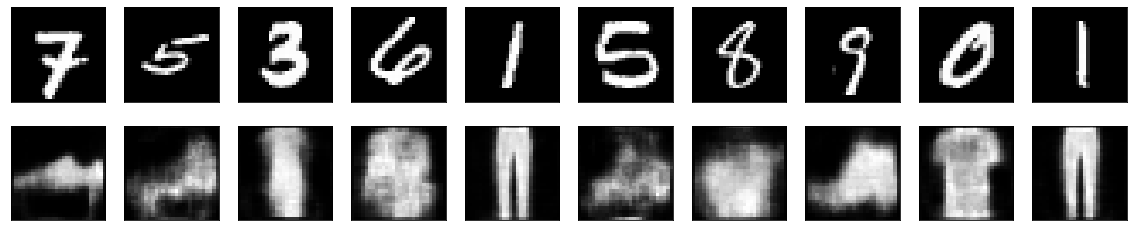

In [ ]:
plotting(xTrain_mnist_5400, 
         pred_mnist, shape=(28,28))

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(xTrain_cif, yTrain_cif),(xTest_cif, yTest_cif) = cifar10.load_data()
xTrain_cif.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
yTrain_cif # как видим, классы неупорядочены, 
            # а также весь датасет состоит из 60000 изображений, в отличие от мниста и fashion mnist, 
            # а значит для того чтобы набрать по 5400 экземпляров каждого класса, объединим xTrain и xTest

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
xTrain_cif = np.concatenate((xTrain_cif, xTest_cif))
yTrain_cif = np.concatenate((yTrain_cif, yTest_cif))

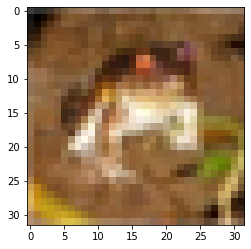

In [ ]:
plt.imshow(xTrain_cif[0])

так как в cifar10 содержатся цветные изображения, а для перевода в массив pandas нужен двумерный массив то оставим только один канал, условия задачи это не запрещают

In [ ]:
xTrain_cif = xTrain_cif[...,0]
xTrain_cif.shape

(60000, 32, 32)

In [ ]:
xTrain_cif = xTrain_cif.reshape(60000, 32*32)
xTrain_cif.shape

(60000, 1024)

In [ ]:
dfCif = pd.DataFrame(xTrain_cif)
dfCif

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,...,122,104,58,34,131,184,97,83,177,168,179,188,202,218,218,207,191,175,166,163,163,161,153,159,162,149,140,148,161,144,112,119,130,120,92,103,170,216,151,123
1,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,...,14,59,49,54,81,103,123,131,163,158,163,145,43,19,20,74,134,119,110,99,61,27,18,17,25,29,16,5,6,10,25,51,68,90,116,134,140,143,143,143
2,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,...,63,53,54,62,66,68,70,78,106,99,95,89,82,78,79,82,84,83,78,79,76,75,78,80,81,80,79,76,72,64,64,69,66,55,52,58,68,78,79,80
3,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,...,116,107,109,106,96,80,76,82,97,94,93,97,96,94,96,79,78,93,105,107,98,99,106,119,104,104,106,122,107,112,92,80,96,77,85,84,67,54,63,72
4,170,168,177,183,181,177,181,184,189,189,188,183,182,184,184,180,177,177,177,176,175,175,173,170,169,168,166,163,163,162,158,157,168,172,171,166,171,174,177,179,...,68,68,67,66,72,76,71,71,67,68,69,72,79,80,77,82,80,84,84,88,87,89,91,92,93,94,92,93,90,88,83,77,75,71,74,72,71,75,71,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,76,76,77,76,75,76,76,76,76,78,81,81,81,80,79,81,81,81,80,81,80,82,81,81,82,82,83,86,87,81,83,86,70,74,81,77,77,76,79,76,...,146,181,198,212,209,207,213,218,53,50,49,49,50,49,61,114,142,149,175,207,219,225,232,234,233,236,238,234,222,216,203,156,146,194,216,222,211,204,200,199
59996,81,91,98,106,108,110,80,84,88,90,92,90,96,111,133,137,126,102,86,26,11,12,14,13,12,13,9,37,86,82,85,94,86,99,106,111,113,123,94,83,...,207,210,164,160,163,160,152,118,120,116,136,167,165,178,165,173,147,153,143,146,164,156,148,147,150,151,156,174,176,199,182,176,159,157,156,156,185,155,171,167
59997,20,19,15,15,14,13,12,11,10,9,8,8,7,6,9,11,11,12,11,11,12,11,12,10,9,11,12,12,12,10,12,13,21,20,18,18,18,18,17,17,...,82,32,28,29,28,27,27,25,31,32,33,33,33,45,108,143,152,176,156,117,134,157,181,193,203,205,194,179,157,141,127,121,62,28,29,28,27,24,26,25
59998,25,15,23,17,23,51,74,91,114,137,90,32,16,9,22,61,47,43,44,31,33,29,28,43,52,52,106,153,89,61,92,75,12,20,24,49,104,160,177,191,...,100,96,93,93,95,101,99,92,95,95,101,111,111,110,108,106,109,109,112,110,112,114,113,115,115,109,108,111,114,108,107,103,103,103,95,92,92,93,95,92


In [ ]:
dfCif['classes'] = yTrain_cif
dfCif.sort_values(by='classes', inplace=True)
dfCif

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,classes
28305,188,184,183,182,180,178,177,176,175,171,166,164,165,164,160,158,160,163,162,161,160,158,157,157,156,157,157,157,157,156,156,155,187,182,181,178,175,172,171,171,...,97,95,95,93,96,96,96,94,94,94,95,94,95,100,105,117,120,106,89,86,86,80,82,89,96,103,105,104,99,99,100,100,100,96,94,93,94,94,93,0
25714,255,251,252,252,252,252,252,252,252,252,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,252,249,245,250,255,255,254,255,255,255,255,255,255,...,211,238,232,244,253,252,255,255,251,252,252,252,252,252,252,253,252,252,251,252,251,251,251,250,247,201,160,162,157,158,161,163,204,244,243,247,250,250,255,0
25719,53,48,47,49,50,54,58,54,48,52,49,46,52,50,52,56,58,50,46,48,61,63,64,83,75,50,43,43,41,41,42,41,46,50,50,45,42,52,52,49,...,39,50,50,41,45,47,48,39,54,63,52,53,46,42,44,45,52,60,53,56,61,65,62,55,71,67,60,55,61,72,68,46,31,42,42,42,49,56,50,0
15661,85,83,80,74,73,72,71,72,70,70,70,70,69,69,68,68,66,65,66,68,73,74,78,79,80,83,91,96,96,99,103,112,64,64,66,63,62,60,60,63,...,116,126,133,139,143,148,150,90,87,87,88,91,97,103,107,110,111,114,116,118,113,106,102,99,94,95,94,89,87,90,98,109,118,124,124,125,125,124,125,0
25746,241,243,242,238,233,228,227,224,214,200,193,193,196,189,185,190,194,197,194,194,196,196,198,201,199,205,211,211,206,207,208,210,243,244,241,237,233,229,229,229,...,181,185,176,172,148,121,112,82,78,85,91,90,83,76,72,61,63,84,92,103,111,109,106,120,164,196,199,197,199,196,178,154,145,151,147,151,151,127,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49460,115,106,109,89,87,102,128,134,136,131,132,139,136,135,133,129,130,130,130,133,133,133,120,104,108,120,130,131,132,130,128,128,119,110,91,71,68,97,114,129,...,95,98,99,97,99,96,92,30,44,65,71,72,67,62,69,74,77,77,77,79,72,67,73,75,81,86,88,89,85,86,93,94,94,94,91,88,87,85,85,9
49461,103,152,141,142,132,56,41,30,42,47,57,134,136,146,118,130,149,140,138,156,162,123,104,101,109,129,144,78,43,63,24,29,112,146,140,146,125,57,39,29,...,10,38,11,11,11,14,28,130,116,91,88,79,72,87,107,129,146,152,158,161,163,166,163,151,159,149,84,48,31,18,19,33,79,97,56,70,83,93,121,9
18337,104,95,81,70,73,91,103,100,92,80,78,85,81,81,69,65,63,61,64,80,92,93,75,59,67,74,73,62,65,80,83,79,151,145,112,63,68,116,130,138,...,147,173,188,198,210,220,225,231,227,227,228,228,229,230,229,228,225,221,217,215,225,237,238,241,235,169,113,100,119,136,141,140,141,149,149,157,175,178,186,9
18423,71,71,72,72,72,72,72,72,73,73,73,74,78,78,79,80,80,81,81,82,81,79,79,80,83,85,83,82,82,82,84,85,76,76,77,77,77,77,76,75,...,162,160,157,156,156,153,151,169,166,166,169,172,172,170,168,173,174,169,167,171,173,173,172,167,167,171,172,169,167,167,165,164,166,165,164,160,158,156,151,9


In [ ]:
df_0 = dfCif.iloc[:5400]
df_1 = dfCif.iloc[6000:6000 + 5400]
df_2 = dfCif.iloc[12000:12000 + 5400]
df_3 = dfCif.iloc[18000:18000 + 5400]
df_4 = dfCif.iloc[24000:24000 + 5400]
df_5 = dfCif.iloc[30000:30000 + 5400]
df_6 = dfCif.iloc[36000:36000 + 5400]
df_7 = dfCif.iloc[42000:42000 + 5400]
df_8 = dfCif.iloc[48000:48000 + 5400]
df_9 = dfCif.iloc[54000:54000 + 5400]

In [ ]:
dfCif_final = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]) # в итоговом датафрейме экземпляров каждого класса по ровну

In [ ]:
yTrain_cif = dfCif_final['classes'].values
dfCif_final.drop('classes', axis=1, inplace=True)

In [ ]:
dfCif_final.values.shape

(54000, 1024)

In [ ]:
xTrain_cif = dfCif_final.values.reshape(54000, 32, 32, 1)
xTrain_cif.shape

(54000, 32, 32, 1)

In [ ]:
# нормируем данные 
xTrain_cif = xTrain_cif / 255

In [ ]:
def my_autoencoder_cifar(shape=(28,28,1)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    z = MaxPooling2D()(x) # передаём на слой подвыборки

    z = Flatten()(z)
    z = Dense(8*8*64, activation='linear')(z) # Меням размер для cifar10
    x = Reshape((8,8,64))(z)


    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 8*8 на 16*16)
    x = BatchNormalization()(x) # слой нормализации данных
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 16*16 на 32*32)
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 3 канала

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [ ]:
mnist_cifar = my_autoencoder_cifar()
mnist_cifar.fit(xTrain_mnist_5400, xTrain_cif,
                batch_size=512,
                epochs=300,
                shuffle=True)

Epoch 1/300
106/106 [==============================] - 12s 113ms/step - loss: 0.0727
Epoch 2/300
106/106 [==============================] - 12s 115ms/step - loss: 0.0610
Epoch 3/300
106/106 [==============================] - 12s 115ms/step - loss: 0.0600
Epoch 4/300
106/106 [==============================] - 12s 113ms/step - loss: 0.0596
Epoch 5/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0594
Epoch 6/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0592
Epoch 7/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0590
Epoch 8/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0588
Epoch 9/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0585
Epoch 10/300
106/106 [==============================] - 12s 112ms/step - loss: 0.0582
Epoch 11/300
106/106 [==============================] - 12s 113ms/step - loss: 0.0577
Epoch 12/300
106/106 [==============================] - 12s 113

In [ ]:
#  mnist_cifar.save('/content/drive/My Drive/модели/modelMN_to_cifar_hw22.h5')
mnist_cifar = load_model('/content/drive/My Drive/модели/modelMN_to_cifar_hw22.h5')

In [ ]:
# смотрим на результат работы автокодировщика
pred_cifar = mnist_cifar.predict(xTrain_mnist_5400)
pred_cifar = pred_cifar * 255 # делаем обратную перенормировку
pred_cifar = pred_cifar.astype('uint8')

In [ ]:
# функция отрисовки картинок
def plotting(xTrain, pred, shape=(112, 80)):
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    index = np.random.randint(0, pred.shape[0])
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xTrain[index].reshape(shape))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[index].reshape(shape))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

# Функция среднеквадратичной ошибки
def getMSE(x1, x2):
  x1 = x1.flatten()
  x2 = x2.flatten()
  delta = x1 - x2
  return sum(delta ** 2) / len(delta)

 

In [ ]:
def plotImages_(startIndex, xTrain, pred, size=(28,28,)):
  n = 5  # Количество картинок, которые хотим показать
  plt.figure(figsize=(10, 4))
  for i in range(n):
      index = i + startIndex
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(xTrain[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(pred[index].reshape(size))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

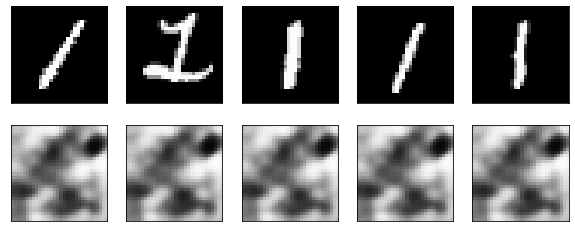

In [ ]:
plotImages_(5400, xTrain_mnist_5400, pred_cifar, size=(32,32,3))